In [46]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt


In [7]:
df = pd.read_csv(r"C:\Users\LENOVO\Downloads\NIFTY 50-07-03-2024-to-07-03-2025.csv", header = 0)
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr)
0,07-MAR-2024,22505.30,22525.65,22430.00,22493.55,379865142.0,33558.46
1,11-MAR-2024,22517.50,22526.60,22307.25,22332.65,277897373.0,27222.37
2,12-MAR-2024,22334.45,22452.55,22256.00,22335.70,299201167.0,29781.12
3,13-MAR-2024,22432.20,22446.75,21905.65,21997.70,493341697.0,40109.23
4,14-MAR-2024,21982.55,22204.60,21917.50,22146.65,426742460.0,37348.30


In [8]:

df.columns = df.columns.str.strip()
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Shares Traded',
       'Turnover (₹ Cr)'],
      dtype='object')


In [9]:
shifted = df['Close'].shift(1)
df["prev close"] = shifted
df.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr),prev close
0,07-MAR-2024,22505.30,22525.65,22430.00,22493.55,379865142.0,33558.46,NaN
1,11-MAR-2024,22517.50,22526.60,22307.25,22332.65,277897373.0,27222.37,22493.55
2,12-MAR-2024,22334.45,22452.55,22256.00,22335.70,299201167.0,29781.12,22332.65
3,13-MAR-2024,22432.20,22446.75,21905.65,21997.70,493341697.0,40109.23,22335.70
4,14-MAR-2024,21982.55,22204.60,21917.50,22146.65,426742460.0,37348.30,21997.70


In [10]:
df.isnull().sum()

Date               0
Open               0
High               0
Low                0
Close              0
Shares Traded      1
Turnover (₹ Cr)    1
prev close         1
dtype: int64

In [64]:
df.dropna(inplace = True)
df.head(73)

,Date,Open,High,Low,Close,Shares Traded,Turnover (₹ Cr),prev close
1,11-MAR-2024,22517.50,22526.60,22307.25,22332.65,277897373.0,27222.37,22493.55
2,12-MAR-2024,22334.45,22452.55,22256.00,22335.70,299201167.0,29781.12,22332.65
3,13-MAR-2024,22432.20,22446.75,21905.65,21997.70,493341697.0,40109.23,22335.70
4,14-MAR-2024,21982.55,22204.60,21917.50,22146.65,426742460.0,37348.30,21997.70
5,15-MAR-2024,22064.85,22120.90,21931.70,22023.35,661460455.0,60260.88,22146.65
...,...,...,...,...,...,...,...,...
69,21-JUN-2024,23661.15,23667.10,23398.20,23501.10,609877803.0,70062.97,23567.00
70,24-JUN-2024,23382.30,23558.10,23350.00,23537.85,239358460.0,24862.37,23501.10
71,25-JUN-2024,23577.10,23754.15,23562.05,23721.30,298111025.0,34263.36,23537.85
72,26-JUN-2024,23723.10,23889.90,23670.45,23868.80,287824687.0,33979.62,23721.30


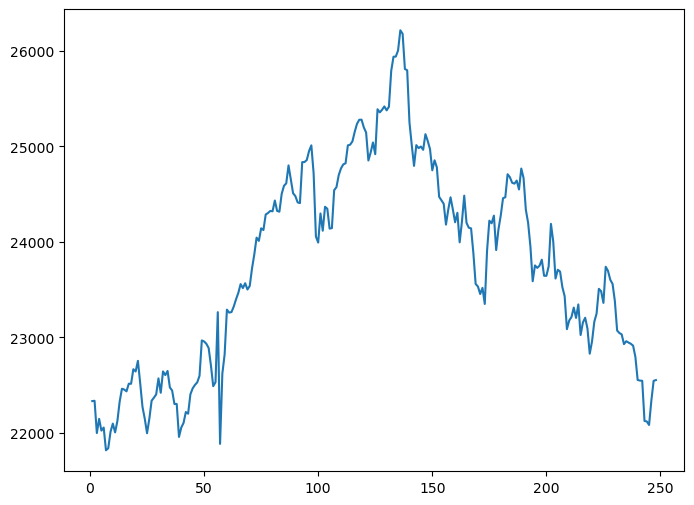

In [12]:
df['Close'].plot(figsize=(8,6))
df.plot


In [13]:
x = df[["Open","prev close","High","Low","Turnover (₹ Cr)","Shares Traded"]]
y = df["Close"]


In [78]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state = 0)
print(x_train.shape, x_test.shape)

(185, 6) (62, 6)


In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score
regressor = LinearRegression()
regressor.fit(x_train , y_train)


LinearRegression()

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix,accuracy_score
regressor = LinearRegression()
regressor.fit(x_train , y_train)
next_day = df.iloc[-1][x.columns].values.reshape(1,-1)
next_day_price = regressor.predict(next_day)
print(f"Predicted Closing Price for the Next Day: {next_day_price[0]:.2f}")
last_day_closing = df.iloc[-1]["Close"]
predicted_df = pd.DataFrame({"Last Day Closing Price: ":last_day_closing,"Next day predicted value: " : next_day_price})

Predicted Closing Price for the Next Day: 22562.39


C:\Users\LENOVO\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [39]:
print(regressor.coef_)
print(regressor.intercept_)

[-5.45050385e-01 -1.63585607e-01  1.03699428e+00  6.67860501e-01
  6.25472132e-04 -5.57510400e-08]
47.02421990342191


In [32]:
predicted_value = regressor.predict(x_test)
print(x_test)


         Open  prev close      High       Low  Turnover (₹ Cr)  Shares Traded
91   24444.95    24479.05  24504.25  24307.25         39538.11    366616574.0
111  24863.40    24770.20  24867.35  24784.45         24227.03    220345125.0
75   23992.95    24010.60  24164.00  23992.70         28204.06    242468081.0
112  24845.40    24811.50  24858.40  24771.65         23134.22    206800655.0
72   23723.10    23721.30  23889.90  23670.45         33979.62    287824687.0
..        ...         ...       ...       ...              ...            ...
161  24302.75    24205.35  24368.25  24280.20          3348.45     38811387.0
228  23761.95    23696.30  23773.55  23556.25         30885.59    306978683.0
110  24680.55    24698.85  24787.95  24654.50         27404.63    257114212.0
151  24664.95    24749.85  24886.20  24567.65         31772.76    290855392.0
163  23916.50    23995.35  24229.05  23842.75         30074.77    289511197.0

[62 rows x 6 columns]


In [74]:
prev_data_predicted_df = pd.DataFrame({"Actual Value": y_test , "Predictions" : predicted_value}).reset_index(drop = True)
prev_data_predicted_df

,Actual Value,Predictions
0,24413.50,24367.784612
1,24811.50,24785.894116
2,24141.95,24127.698514
3,24823.15,24771.190820
4,23868.80,23823.731271
...,...,...
57,24304.35,24326.607165
58,23603.35,23606.718664
59,24770.20,24728.040179
60,24854.05,24772.932141


In [79]:
regressor.score(x_test,y_test)

0.9953266658268426

In [80]:
import math
print("Mean abssolute error: ",metrics.mean_absolute_error(y_test,predicted_value))
print("Meam square error: ",metrics.mean_squared_error(y_test,predicted_value))
print("Mean square root error : ",math.sqrt(metrics.mean_squared_error(y_test,predicted_value)))

Mean abssolute error:  47.3928473964563
Meam square error:  4609.838674646152
Mean square root error :  67.89579276101098
